In [1]:
import numpy as np
import pandas as pd 
import scipy
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
import thinkstats2
import thinkplot

pd.options.display.float_format = '{:.2f}'.format # change the display format of numbers

In [2]:
saffronart_df = pd.read_csv('updated_saffronart_dataset.csv') 

# change the dates to Pandas datetime objects:
saffronart_df['auction_date'] = pd.to_datetime(saffronart_df['auction_date'])
saffronart_df['birth_date'] = pd.to_datetime(saffronart_df['birth_date'])
saffronart_df['death_date'] = pd.to_datetime(saffronart_df['death_date'])

saffronart_df.head(5)

,artist,birth_date,birth_place,death_date,artist_age,title,winning_bid,low_est,high_est,auction_date,category,style,size,medium,area_or_vol,auction_dt_age
0,akhilesh,1956-01-01,Indore,NaT,63.00,Divine Conversation,9000.00,5000.00,7000.00,2019-06-01,painting,abstract,71.5 x 71.5 in,acrylic on canvas,5112.25,63.00
1,akhilesh,1956-01-01,Indore,NaT,63.00,In search of Untitled forms -II,1120.00,5000.00,6670.00,2013-11-01,painting,abstract,32.5 x 44 in,acrylic on canvas,1430.00,57.00
2,akhilesh,1956-01-01,Indore,NaT,63.00,In Search of Untitled Lines,6186.00,6900.00,8625.00,2013-08-01,painting,NaN,47 x 47 in,acrylic on canvas,2209.00,57.00
3,akhilesh,1956-01-01,Indore,NaT,63.00,Magadhi,2400.00,5770.00,7695.00,2013-02-01,painting,abstract,33 x 44.5 in,acrylic on canvas,1468.50,57.00
4,akhilesh,1956-01-01,Indore,NaT,63.00,Untitled,2942.00,6735.00,8655.00,2013-02-01,painting,abstract,40 x 40 in,acrylic on canvas,1600.00,57.00


---
# Price and Artist's Age

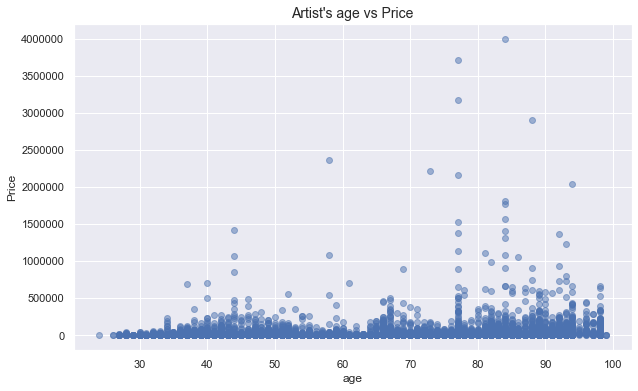

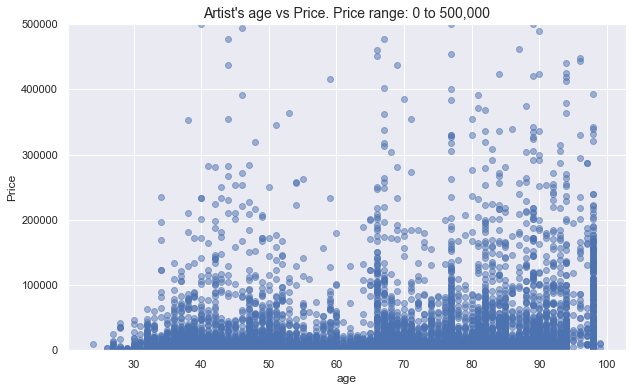

In [3]:
# Draw Scatter Plot:
price = saffronart_df.winning_bid 
age = saffronart_df.auction_dt_age # the artist's age at the time of the auction

def scatter_price(x_values, price, x_name, price_lim=None):
    plt.figure(figsize=(10, 6))
    plt.scatter(x_values, price, alpha=0.5)
    plt.ylim(price_lim)
    
    plt.xlabel(x_name, fontsize=12)
    plt.ylabel('Price', fontsize=12)
    
    try:
        plt.title("Artist's age vs Price. Price range: {:,} to {:,}".format(price_lim[0], price_lim[1]), fontsize=14)
    except TypeError: # if price_lim is not given
        plt.title("Artist's age vs Price", fontsize=14)
    
scatter_price(age, price, 'age')
scatter_price(age, price, 'age', price_lim=(0, 500000))

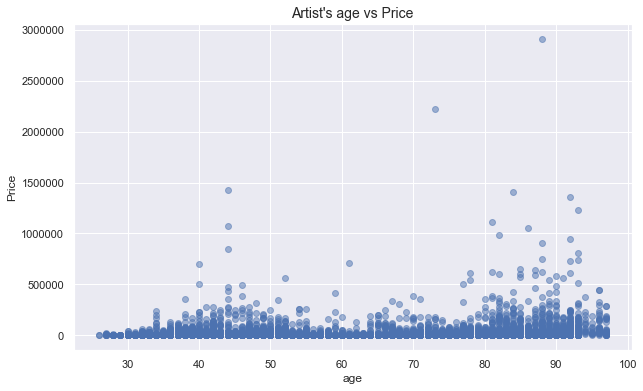

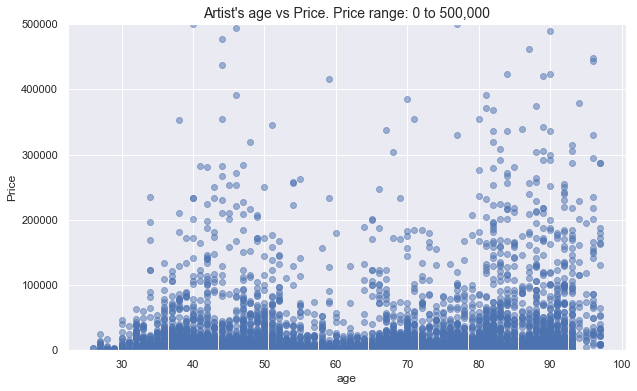

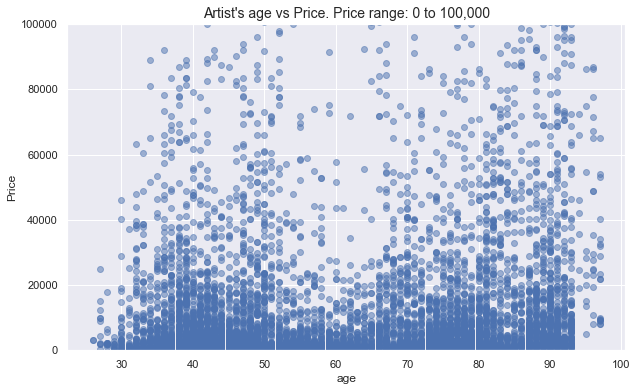

In [4]:
alive = saffronart_df.loc[saffronart_df.auction_dt_age < saffronart_df.artist_age]

alive_price = alive.winning_bid
alive_age = alive.auction_dt_age

scatter_price(alive_age, alive_price, 'age')
scatter_price(alive_age, alive_price, 'age', price_lim=(0, 500000))
scatter_price(alive_age, alive_price, 'age', price_lim=(0, 100000))

In [5]:
def price_percentiles_by_gr(df, x_bins, x_var_name, percentiles_list=[75, 50, 25]):
    plt.figure(figsize=(10, 6)) 

    indices = np.digitize(df[x_var_name], x_bins) 
    groups = df.groupby(indices) 

    mean_xs = [group[x_var_name].mean() for i, group in groups]
    price_cdfs = [thinkstats2.Cdf(group.winning_bid) for i, group in groups]

    for percent in percentiles_list: 
        price_percentiles = [cdf.Percentile(percent) for cdf in price_cdfs] 
        label = '{}th'.format(percent) 
        plt.plot(mean_xs, price_percentiles, label=label, linewidth = 3)
        
    plt.xlabel(x_var_name)
    plt.ylabel('price')
    plt.title('Price percentiles by groups of {}'.format(x_var_name), size=14)
    
    plt.legend()

In [6]:
min_age = alive.auction_dt_age.min()
print("Min alive age: ", min_age)

max_age = alive.auction_dt_age.max()
print("Max alive age: ", max_age)

Min alive age:  26.0
Max alive age:  97.0


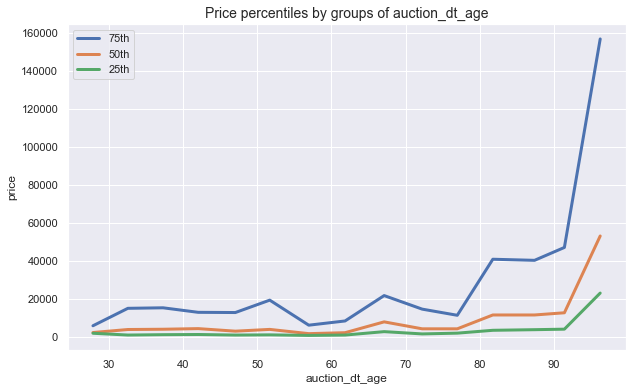

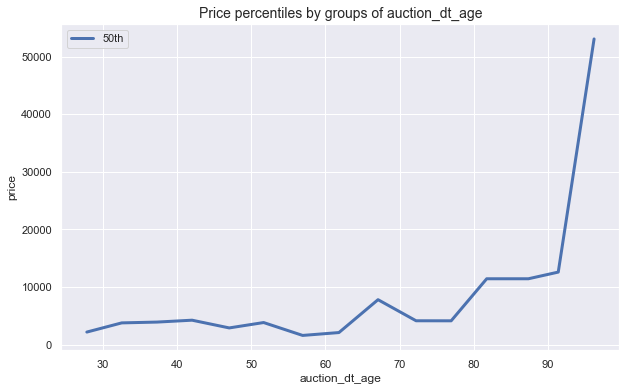

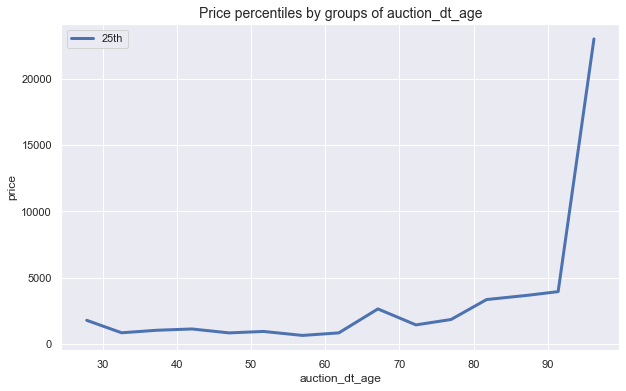

In [7]:
alive_no_na = alive.dropna(subset=['auction_dt_age', 'winning_bid'])  # drop na values

age_bins = np.arange(25, 105, 5)

price_percentiles_by_gr(alive_no_na, age_bins, 'auction_dt_age', percentiles_list=[75, 50, 25])
price_percentiles_by_gr(alive_no_na, age_bins, 'auction_dt_age', percentiles_list=[50])
price_percentiles_by_gr(alive_no_na, age_bins, 'auction_dt_age', percentiles_list=[25])

---
# Price and Size

(0, 30000)

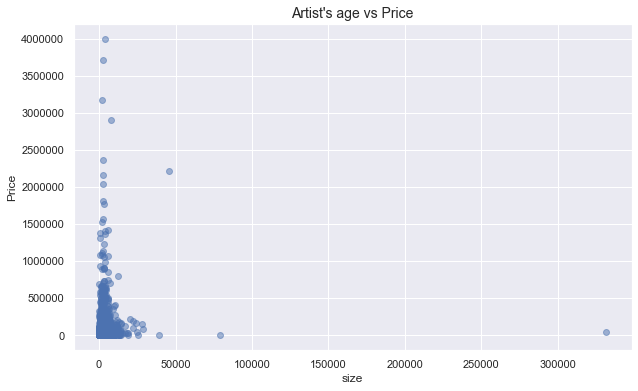

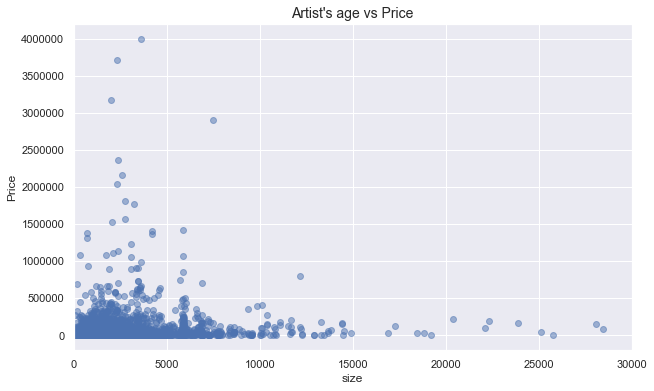

In [8]:
area_vol = saffronart_df.area_or_vol 

scatter_price(area_vol, price, 'size', price_lim=None)

scatter_price(area_vol, price, 'size', price_lim=None)
plt.xlim((0, 30000))

In [9]:
min_av = saffronart_df.area_or_vol.min()
print("Min area/volume: ", min_av)

max_av = saffronart_df.area_or_vol.max()
print("Max area/volume: ", max_av)

Min area/volume:  1.1
Max area/volume:  331776.0


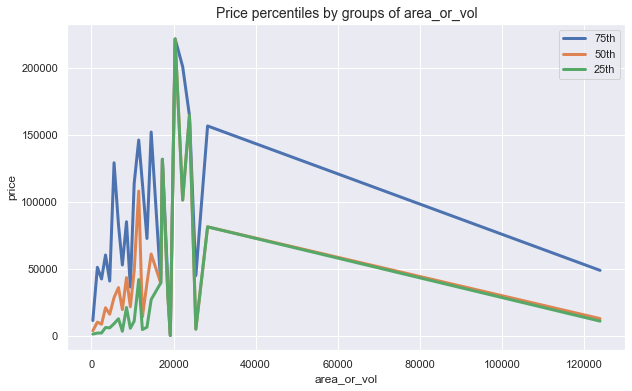

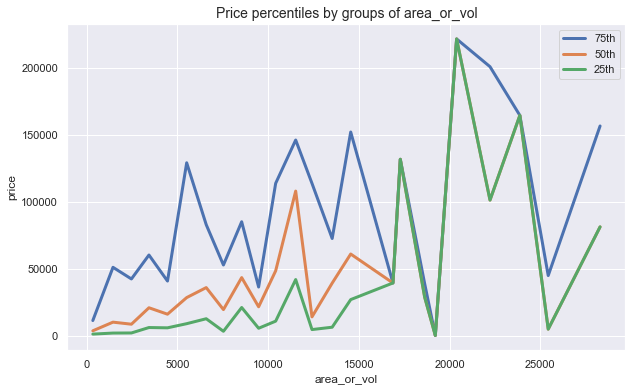

In [21]:
area_vol_bins = np.arange(0, 30000, 1000)

avail_prices = saffronart_df.loc[saffronart_df.winning_bid.notnull()]
less_30k = avail_prices.loc[avail_prices.area_or_vol<30000].copy()

price_percentiles_by_gr(avail_prices, area_vol_bins, 'area_or_vol')
price_percentiles_by_gr(less_30k, area_vol_bins, 'area_or_vol')